# Zelda BOTW - Weapon, Shield and Bow Analysis
## Load and preprocess the dataset

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import combinations

In [147]:
# Load the .csv data to a dataframe
dataframe = pd.read_csv("Zelda-data.csv")

In [148]:
dataframe.shape

(284, 25)

In [149]:
dataframe

,name,image,class,subclass,tags,durability,strength,range,arrows,defense,...,description,selling_price,bonus_set,upgrade_1,upgrade_2,upgrade_3,upgrade_4,armor_upgrade,where_to_find,notes
0,Ancient Short Sword,BotW_Ancient_Short_Sword_Icon.png?version=486c...,Weapon,Light,NaN,54.0,40.0,NaN,NaN,NaN,...,The blade of this sword was made using an anci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Blizzard Rod,BotW_Blizzard_Rod_Icon.png?version=f9bd2bfd010...,Weapon,Light,NaN,32.0,10.0,NaN,NaN,NaN,...,A magical rod that can cast extreme cold in a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Boko Club,BotW_Boko_Club_Icon.png?version=e018fd887fdac1...,Weapon,Light,NaN,8.0,4.0,NaN,NaN,NaN,...,A crude Bokoblin club made to clobber small pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bokoblin Arm,BotW_Bokoblin_Arm_Icon.png?version=be25984d7c0...,Weapon,Light,NaN,5.0,5.0,NaN,NaN,NaN,...,A skeletal arm that keeps moving even after it...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boomerang,BotW_Boomerang_Icon.png?version=96318352d5aae4...,Weapon,Light,NaN,18.0,8.0,NaN,NaN,NaN,...,This throwing weapon was originally used by th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Trousers of the Wild,BotW_Trousers_of_the_Wild_Icon.png?version=f2a...,Armor,Leg,NaN,NaN,NaN,NaN,NaN,4.0,...,Legends says these pants were tailored for a h...,125.0,Master Sword Beam,"Acorn x10, Farosh's Scale x2","Courser Bee Honey x5, Farosh's Claw x2","Energetic Rhino Beetle x5, Farosh's Fang x2","Star Fragment x1, Farosh's Horn x2","Star Fragment,Acorn,Farosh's Scale,Courser Bee...",Find all 120 Shrines,NaN
280,Trousers of the Wind,BotW_Trousers_of_the_Wind_Icon.png?version=dd8...,Armor,Leg,NaN,NaN,NaN,NaN,NaN,3.0,...,Legends say these trousers were cherished by a...,125.0,Master Sword Beam,"Opal x3, Star Fragment x1","Opal x5, Star Fragment x3","Opal x15, Star Fragment x3","Opal x30, Star Fragment x4","Star Fragment,Opal",Amiibo - Toon/WW Link,NaN
281,Trousers of the Sky,BotW_Trousers_of_the_Sky_Icon.png?version=addb...,Armor,Leg,NaN,NaN,NaN,NaN,NaN,3.0,...,Legends say these trousers were once worn by a...,125.0,Master Sword Beam,"Sapphire x1, Star Fragment x1","Sapphire x3, Star Fragment x2","Sapphire x5, Star Fragment x3","Sapphire x10, Star Fragment x4","Star Fragment,Sapphire",Amiibo -,NaN
282,Well-Worn Trousers,BotW_Well-Worn_Trousers_Icon.png?version=3b33f...,Armor,Leg,NaN,NaN,NaN,NaN,NaN,1.0,...,"These old trousers are threadbare in spots, bu...",15.0,NaN,NaN,NaN,NaN,NaN,NaN,Shrine - Resurrection,NaN


In [150]:
columns_to_remove = ["image", "tags", "range", "arrows", "defense", "selling_price", "bonus_set", "upgrade_1", "upgrade_2", "upgrade_3", "upgrade_4", "armor_upgrade", "where_to_find", "notes", "defense_upgrade_lvl1", "defense_upgrade_lvl2", "defense_upgrade_lvl3", "defense_upgrade_lvl4", "bonus", "description"]

for col in columns_to_remove:
    dataframe = dataframe.drop(col, axis=1)

dataframe['subclass'] = dataframe['subclass'].replace(np.nan, "None")

In [151]:
dataframe

,name,class,subclass,durability,strength
0,Ancient Short Sword,Weapon,Light,54.0,40.0
1,Blizzard Rod,Weapon,Light,32.0,10.0
2,Boko Club,Weapon,Light,8.0,4.0
3,Bokoblin Arm,Weapon,Light,5.0,5.0
4,Boomerang,Weapon,Light,18.0,8.0
...,...,...,...,...,...
279,Trousers of the Wild,Armor,Leg,NaN,NaN
280,Trousers of the Wind,Armor,Leg,NaN,NaN
281,Trousers of the Sky,Armor,Leg,NaN,NaN
282,Well-Worn Trousers,Armor,Leg,NaN,NaN


In [152]:
dataframe.dtypes

name           object
class          object
subclass       object
durability    float64
strength      float64
dtype: object

In [153]:
dataframe.shape

(284, 5)

## Add attack power

In [154]:
attack_power = []

for i in range(dataframe.shape[0]):
    if dataframe.loc[i,"subclass"]=="Light":
        attack_power.append(2.13)
    elif dataframe.loc[i,"subclass"]=="Heavy":
        attack_power.append(0.83)
    elif dataframe.loc[i,"subclass"]=="Pole-arm":
        attack_power.append(2.50)
    elif dataframe.loc[i,"class"]=="Bow" and dataframe.loc[i,"subclass"]==None:
        attack_power.append(0.70)
    else:
        attack_power.append(0.0)
        
# dataframe['attack_power'] = attack_power 
dataframe.insert(5, "attack_power", attack_power, True) 

In [155]:
dataframe.shape

(284, 6)

In [156]:
dataframe

,name,class,subclass,durability,strength,attack_power
0,Ancient Short Sword,Weapon,Light,54.0,40.0,2.13
1,Blizzard Rod,Weapon,Light,32.0,10.0,2.13
2,Boko Club,Weapon,Light,8.0,4.0,2.13
3,Bokoblin Arm,Weapon,Light,5.0,5.0,2.13
4,Boomerang,Weapon,Light,18.0,8.0,2.13
...,...,...,...,...,...,...
279,Trousers of the Wild,Armor,Leg,NaN,NaN,0.00
280,Trousers of the Wind,Armor,Leg,NaN,NaN,0.00
281,Trousers of the Sky,Armor,Leg,NaN,NaN,0.00
282,Well-Worn Trousers,Armor,Leg,NaN,NaN,0.00


## Get weapons, shields and bows

### Get weapons

In [157]:
weapons = dataframe[dataframe["class"] == "Weapon"]
print(weapons['durability'].max())
weapons['durability'] = weapons['durability'].replace(np.nan, 200.0)
print(weapons['durability'].max())

80.0
200.0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
weapons

,name,class,subclass,durability,strength,attack_power
0,Ancient Short Sword,Weapon,Light,54.0,40.0,2.13
1,Blizzard Rod,Weapon,Light,32.0,10.0,2.13
2,Boko Club,Weapon,Light,8.0,4.0,2.13
3,Bokoblin Arm,Weapon,Light,5.0,5.0,2.13
4,Boomerang,Weapon,Light,18.0,8.0,2.13
...,...,...,...,...,...,...
122,Throwing Spear,Weapon,Pole-arm,20.0,6.0,2.50
123,Thunderspear,Weapon,Pole-arm,50.0,22.0,2.50
124,Traveler's Spear,Weapon,Pole-arm,30.0,3.0,2.50
125,Wooden Mop,Weapon,Pole-arm,8.0,5.0,2.50


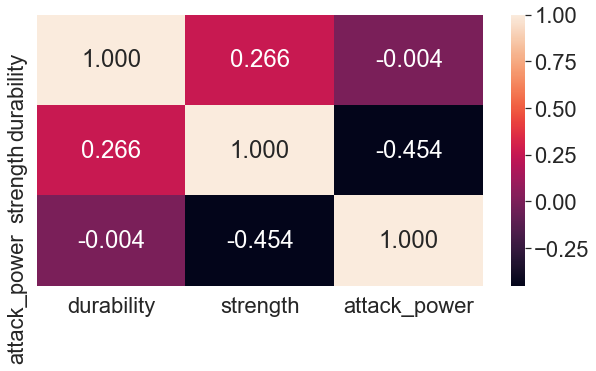

In [159]:
# correlation matrix
sns.set(font_scale=2)
fig, ax = plt.subplots(1,1, figsize=(10,5))
my_cols = ['durability', 'strength', 'attack_power']
all_cor = sns.heatmap(weapons[my_cols].corr(), fmt=".3f", annot=True)

plt.savefig('weapons_heatmap.png', bbox_inches='tight')

### Get shields

In [160]:
shields = dataframe[dataframe["class"] == "Shield"]

In [161]:
shields.shape

(33, 6)

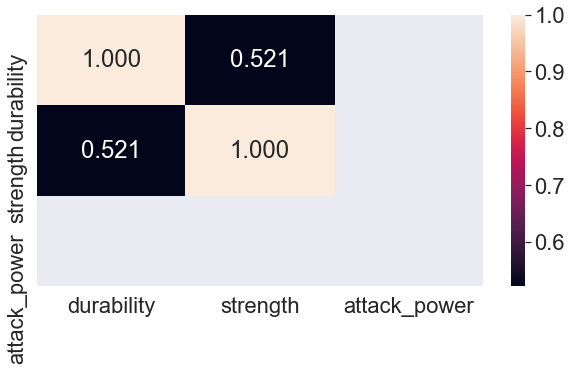

In [162]:
# correlation matrix
fig, ax = plt.subplots(1,1, figsize=(10,5))
all_cor = sns.heatmap(shields[my_cols].corr(), fmt=".3f", annot=True)

plt.savefig('shields_heatmap.png', bbox_inches='tight')

### Get bows

In [163]:
bows = dataframe[dataframe["class"] == "Bow"]

# Get names of indexes with arrows
indexNames = bows[ bows['subclass'] == "Arrow" ].index
 
# Delete these row indexes from dataFrame
bows.drop(indexNames , inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [164]:
# remove 'Bow of Light'
indexNames = bows[ bows['name'] == 'Bow of Light' ].index
 
# Delete these row indexes from dataFrame
bows.drop(indexNames , inplace=True)

In [165]:
bows.shape

(25, 6)

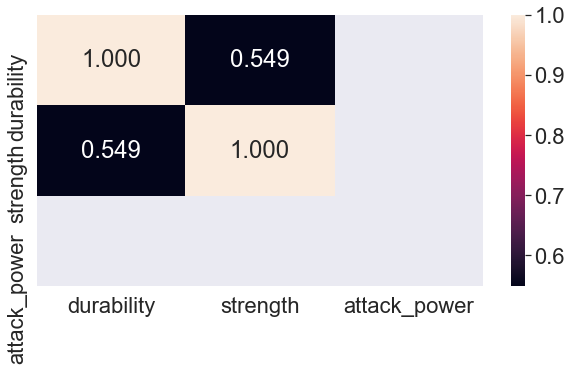

In [166]:
# correlation matrix
fig, ax = plt.subplots(1,1, figsize=(10,5))
all_cor = sns.heatmap(bows[my_cols].corr(), fmt=".3f", annot=True)

plt.savefig('bows_heatmap.png', bbox_inches='tight')

## Analyse Weapons + Shields

In [167]:
weapons_shields = pd.concat([weapons, shields], ignore_index=True)

In [168]:
weapons_shields.shape

(160, 6)

In [169]:
weapons_shields

,name,class,subclass,durability,strength,attack_power
0,Ancient Short Sword,Weapon,Light,54.0,40.0,2.13
1,Blizzard Rod,Weapon,Light,32.0,10.0,2.13
2,Boko Club,Weapon,Light,8.0,4.0,2.13
3,Bokoblin Arm,Weapon,Light,5.0,5.0,2.13
4,Boomerang,Weapon,Light,18.0,8.0,2.13
...,...,...,...,...,...,...
155,Soldier's Shield,Shield,None,16.0,16.0,0.00
156,Spiked Boko Shield,Shield,None,7.0,10.0,0.00
157,Steel Lizal Shield,Shield,None,15.0,35.0,0.00
158,Traveler's Shield,Shield,None,12.0,4.0,0.00


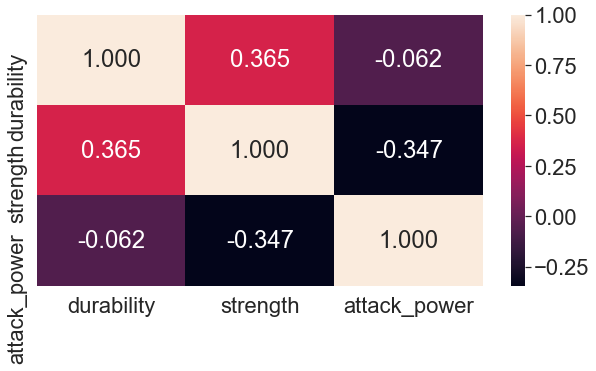

In [170]:
# looking at whether things different factors move together
fig, ax = plt.subplots(1,1, figsize=(10,5))
all_cor = sns.heatmap(weapons_shields[my_cols].corr(), fmt=".3f", annot=True)

plt.savefig('weapons_shields_heatmap.png', bbox_inches='tight')

In [171]:
dataframe2 = weapons_shields.set_index("name", drop = False)
dataframe2

,name,class,subclass,durability,strength,attack_power
name,,,,,,
Ancient Short Sword,Ancient Short Sword,Weapon,Light,54.0,40.0,2.13
Blizzard Rod,Blizzard Rod,Weapon,Light,32.0,10.0,2.13
Boko Club,Boko Club,Weapon,Light,8.0,4.0,2.13
Bokoblin Arm,Bokoblin Arm,Weapon,Light,5.0,5.0,2.13
Boomerang,Boomerang,Weapon,Light,18.0,8.0,2.13
...,...,...,...,...,...,...
Soldier's Shield,Soldier's Shield,Shield,None,16.0,16.0,0.00
Spiked Boko Shield,Spiked Boko Shield,Shield,None,7.0,10.0,0.00
Steel Lizal Shield,Steel Lizal Shield,Shield,None,15.0,35.0,0.00


In [172]:
dataframe2.index

Index(['Ancient Short Sword', 'Blizzard Rod', 'Boko Club', 'Bokoblin Arm',
       'Boomerang', 'Demon Carver', 'Dragonbone Boko Club', 'Eightfold Blade',
       'Fire Rod', 'Fishing Harpoon',
       ...
       'Royal Shield', 'Rusty Shield', 'Savage Lynel Shield',
       'Shield of the Mind's Eye', 'Silver Shield', 'Soldier's Shield',
       'Spiked Boko Shield', 'Steel Lizal Shield', 'Traveler's Shield',
       'Wooden Shield'],
      dtype='object', name='name', length=160)

In [173]:
my_data = []

my_combinations = list(combinations(dataframe2.index,2))

valid_combinations = []

for comb in my_combinations:
    if dataframe2.loc[comb[0],"class"] != dataframe2.loc[comb[1],"class"]:
        valid_combinations.append(comb)
        data_line = []
        data_line.append(np.mean([dataframe2.loc[comb[0],"durability"], dataframe2.loc[comb[1],"durability"]]))
        data_line.append(np.mean([dataframe2.loc[comb[0],"strength"], dataframe2.loc[comb[1],"strength"]]))
        data_line.append(np.sum([dataframe2.loc[comb[0],"attack_power"], dataframe2.loc[comb[1],"attack_power"]]))
        my_data.append(data_line)
    
my_combinations = pd.DataFrame(my_data, columns = ['durability', 'strength', 'attack_power'], index=valid_combinations)
my_combinations

,durability,strength,attack_power
"(Ancient Short Sword, Ancient Shield)",43.0,55.0,2.13
"(Ancient Short Sword, Boko Shield)",29.5,21.5,2.13
"(Ancient Short Sword, Daybreaker)",57.0,44.0,2.13
"(Ancient Short Sword, Dragonbone Boko Shield)",31.0,32.5,2.13
"(Ancient Short Sword, Emblazoned Shield)",33.0,21.5,2.13
...,...,...,...
"(Zora Spear, Soldier's Shield)",28.0,12.5,2.50
"(Zora Spear, Spiked Boko Shield)",23.5,9.5,2.50
"(Zora Spear, Steel Lizal Shield)",27.5,22.0,2.50
"(Zora Spear, Traveler's Shield)",26.0,6.5,2.50


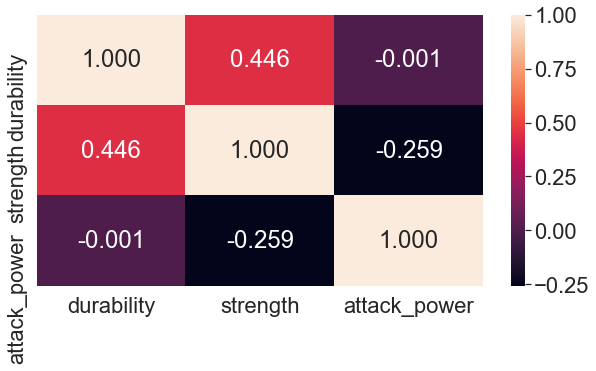

In [175]:
# correlation matrix
fig, ax = plt.subplots(1,1, figsize=(10,5))
all_cor = sns.heatmap(my_combinations[my_cols].corr(), fmt=".3f", annot=True)

plt.savefig('weapons_shields_comb_heatmap.png', bbox_inches='tight')

### Get Pareto-optimal Combinations and Pareto front

In [180]:
combinations1 = my_combinations.copy()
combinations1 = combinations1[['durability', 'strength', 'attack_power']]
combinations1 = combinations1.to_numpy()
combinations1

array([[43.  , 55.  ,  2.13],
       [29.5 , 21.5 ,  2.13],
       [57.  , 44.  ,  2.13],
       ...,
       [27.5 , 22.  ,  2.5 ],
       [26.  ,  6.5 ,  2.5 ],
       [26.  ,  5.5 ,  2.5 ]])

In [181]:
# function to find Pareto optimal combinations
# credit: https://pythonhealthcare.org/tag/pareto-front/ and https://github.com/meredithwan/PUBG

def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' point is dominated by out 'j' point
            if all(scores[j] >= scores[i]) and any(scores[j] > scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

In [182]:
# credit: https://pythonhealthcare.org/tag/pareto-front/ and https://github.com/meredithwan/PUBG
pareto = identify_pareto(combinations1)
print ('Pareto front index values')
print ('Points on Pareto front: \n',pareto)

pareto_front = combinations1[pareto]
print ('\nPareto front scores')
print (pareto_front)

Pareto front index values
Points on Pareto front: 
 [  13  871 1102 1135 1828 2719 3049 3610 3742]

Pareto front scores
[[427.    65.     2.13]
 [500.    60.     2.13]
 [420.5   74.     2.13]
 [430.    61.     2.13]
 [430.    75.     0.83]
 [417.5   84.     0.83]
 [425.    60.     2.5 ]
 [435.    56.     2.5 ]
 [407.5   61.     2.5 ]]


In [183]:
pareto_front_df = pd.DataFrame(pareto_front)
pareto_front_df2 = pareto_front_df.copy()
pareto_front_df2

,0,1,2
0,427.0,65.0,2.13
1,500.0,60.0,2.13
2,420.5,74.0,2.13
3,430.0,61.0,2.13
4,430.0,75.0,0.83
5,417.5,84.0,0.83
6,425.0,60.0,2.50
7,435.0,56.0,2.50
8,407.5,61.0,2.50


In [184]:
combinations2 = my_combinations.copy()
combinations2 = combinations2.reset_index()
combinations2

,index,durability,strength,attack_power
0,"(Ancient Short Sword, Ancient Shield)",43.0,55.0,2.13
1,"(Ancient Short Sword, Boko Shield)",29.5,21.5,2.13
2,"(Ancient Short Sword, Daybreaker)",57.0,44.0,2.13
3,"(Ancient Short Sword, Dragonbone Boko Shield)",31.0,32.5,2.13
4,"(Ancient Short Sword, Emblazoned Shield)",33.0,21.5,2.13
...,...,...,...,...
4186,"(Zora Spear, Soldier's Shield)",28.0,12.5,2.50
4187,"(Zora Spear, Spiked Boko Shield)",23.5,9.5,2.50
4188,"(Zora Spear, Steel Lizal Shield)",27.5,22.0,2.50
4189,"(Zora Spear, Traveler's Shield)",26.0,6.5,2.50


In [185]:
combi = []
for i in pareto:
    combi.append(combinations2['index'][i])

for comb in combi:
    print(comb)



('Ancient Short Sword', 'Hylian Shield')
('Master Sword', 'Hylian Shield')
('Savage Lynel Sword', 'Hylian Shield')
('Scimitar of the Seven', 'Hylian Shield')
('Boulder Breaker', 'Hylian Shield')
('Savage Lynel Crusher', 'Hylian Shield')
('Ancient Spear', 'Hylian Shield')
('Lightscale Trident', 'Hylian Shield')
("Royal Guard's Spear", 'Hylian Shield')


In [186]:
pareto_front_df2['combi'] = combi
pareto_front_df2

,0,1,2,combi
0,427.0,65.0,2.13,"(Ancient Short Sword, Hylian Shield)"
1,500.0,60.0,2.13,"(Master Sword, Hylian Shield)"
2,420.5,74.0,2.13,"(Savage Lynel Sword, Hylian Shield)"
3,430.0,61.0,2.13,"(Scimitar of the Seven, Hylian Shield)"
4,430.0,75.0,0.83,"(Boulder Breaker, Hylian Shield)"
5,417.5,84.0,0.83,"(Savage Lynel Crusher, Hylian Shield)"
6,425.0,60.0,2.50,"(Ancient Spear, Hylian Shield)"
7,435.0,56.0,2.50,"(Lightscale Trident, Hylian Shield)"
8,407.5,61.0,2.50,"(Royal Guard's Spear, Hylian Shield)"


In [187]:
pareto_front_df2.sort_values(0, inplace=True)
pareto_front = pareto_front_df2.values
pareto_front

array([[407.5, 61.0, 2.5, ("Royal Guard's Spear", 'Hylian Shield')],
       [417.5, 84.0, 0.83, ('Savage Lynel Crusher', 'Hylian Shield')],
       [420.5, 74.0, 2.13, ('Savage Lynel Sword', 'Hylian Shield')],
       [425.0, 60.0, 2.5, ('Ancient Spear', 'Hylian Shield')],
       [427.0, 65.0, 2.13, ('Ancient Short Sword', 'Hylian Shield')],
       [430.0, 61.0, 2.13, ('Scimitar of the Seven', 'Hylian Shield')],
       [430.0, 75.0, 0.83, ('Boulder Breaker', 'Hylian Shield')],
       [435.0, 56.0, 2.5, ('Lightscale Trident', 'Hylian Shield')],
       [500.0, 60.0, 2.13, ('Master Sword', 'Hylian Shield')]],
      dtype=object)

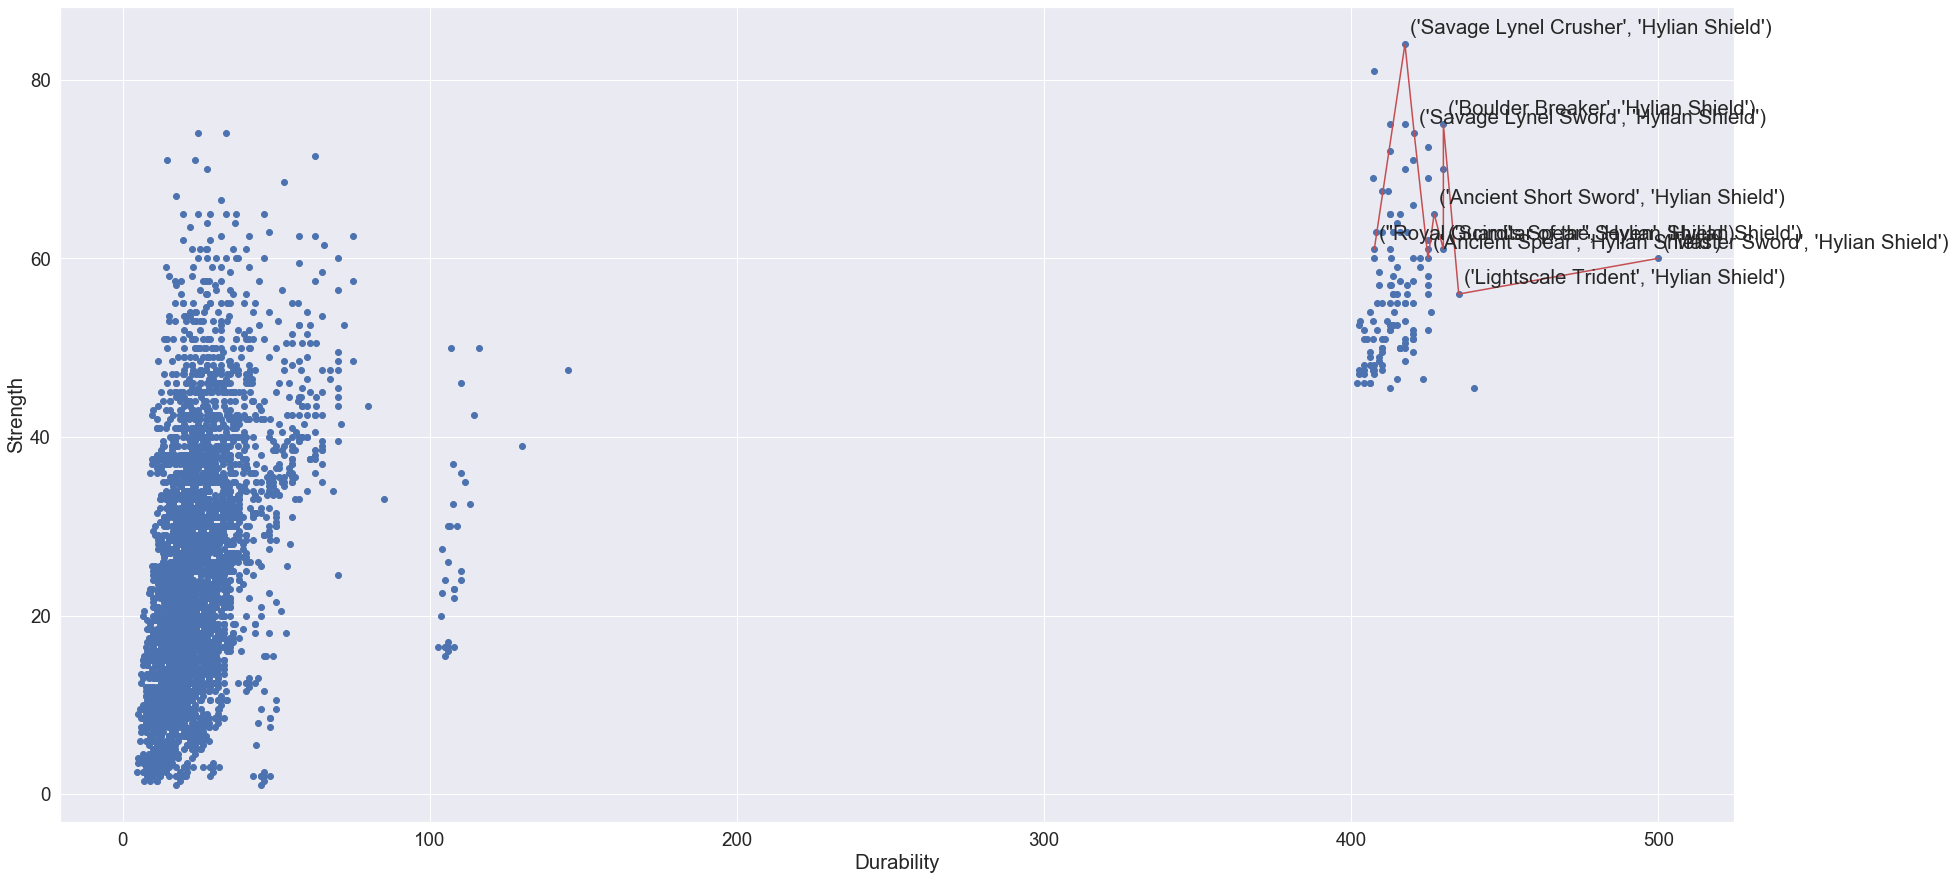

In [191]:
# plotting Pareto frontier

sns.set(font_scale=1.7)

x_all = combinations1[:, 0]
y_all = combinations1[:, 1]
x_pareto = pareto_front[:, 0]
y_pareto = pareto_front[:, 1]

fig, ax = plt.subplots(1,1, figsize=(30,15))

plt.scatter(x_all, y_all)
plt.plot(x_pareto, y_pareto, color='r')

for label, x, y in zip(pareto_front[:, 3], pareto_front[:, 0], pareto_front[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(5, 10),
        textcoords='offset points', ha='left')

plt.xlabel('Durability')
plt.ylabel('Strength')
# plt.xlim(0,1050)
plt.draw()

plt.savefig('weapons_shileds_pareto_front_ap.png', bbox_inches='tight')

## Analyse Weapons + Shields + Bows

In [35]:
weapons_shields_bows = pd.concat([weapons, shields, bows], ignore_index=True)

In [36]:
weapons_shields_bows.shape

(185, 5)

In [37]:
weapons_shields_bows

,name,class,subclass,durability,strength
0,Ancient Short Sword,Weapon,Light,54.0,40.0
1,Blizzard Rod,Weapon,Light,32.0,10.0
2,Boko Club,Weapon,Light,8.0,4.0
3,Bokoblin Arm,Weapon,Light,5.0,5.0
4,Boomerang,Weapon,Light,18.0,8.0
...,...,...,...,...,...
180,Steel Lizal Bow,Bow,None,50.0,36.0
181,Swallow Bow,Bow,None,30.0,9.0
182,Traveler's Bow,Bow,None,22.0,5.0
183,Twilight Bow,Bow,None,100.0,30.0


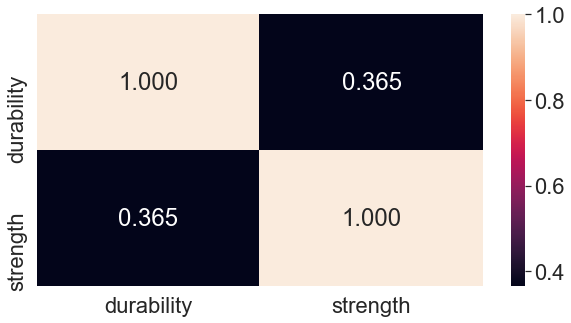

In [38]:
# correlation matrix
sns.set(font_scale=2)

fig, ax = plt.subplots(1,1, figsize=(10,5))
all_cor = sns.heatmap(weapons_shields_bows[my_col].corr(), fmt=".3f", annot=True)

plt.savefig('weapons_shields_bows_heatmap.png', bbox_inches='tight')

In [39]:
dataframe3 = weapons_shields_bows.set_index("name", drop = False)
dataframe3

,name,class,subclass,durability,strength
name,,,,,
Ancient Short Sword,Ancient Short Sword,Weapon,Light,54.0,40.0
Blizzard Rod,Blizzard Rod,Weapon,Light,32.0,10.0
Boko Club,Boko Club,Weapon,Light,8.0,4.0
Bokoblin Arm,Bokoblin Arm,Weapon,Light,5.0,5.0
Boomerang,Boomerang,Weapon,Light,18.0,8.0
...,...,...,...,...,...
Steel Lizal Bow,Steel Lizal Bow,Bow,None,50.0,36.0
Swallow Bow,Swallow Bow,Bow,None,30.0,9.0
Traveler's Bow,Traveler's Bow,Bow,None,22.0,5.0


In [40]:
dataframe3.index

Index(['Ancient Short Sword', 'Blizzard Rod', 'Boko Club', 'Bokoblin Arm',
       'Boomerang', 'Demon Carver', 'Dragonbone Boko Club', 'Eightfold Blade',
       'Fire Rod', 'Fishing Harpoon',
       ...
       'Royal Guard's Bow', 'Savage Lynel Bow', 'Silver Bow', 'Soldier's Bow',
       'Spiked Boko Bow', 'Steel Lizal Bow', 'Swallow Bow', 'Traveler's Bow',
       'Twilight Bow', 'Wooden Bow'],
      dtype='object', name='name', length=185)

In [41]:
my_data = []

my_combinations = list(combinations(dataframe3.index,3))

valid_combinations = []

for comb in my_combinations:
    if dataframe3.loc[comb[0],"class"] != dataframe3.loc[comb[1],"class"] and dataframe3.loc[comb[1],"class"] != dataframe3.loc[comb[2],"class"] and dataframe3.loc[comb[0],"class"] != dataframe3.loc[comb[2],"class"]:
        valid_combinations.append(comb)
        data_line = []
        data_line.append(np.mean([dataframe3.loc[comb[0],"durability"], dataframe3.loc[comb[1],"durability"], dataframe3.loc[comb[2],"durability"]]))
        data_line.append(np.mean([dataframe3.loc[comb[0],"strength"], dataframe3.loc[comb[1],"strength"],dataframe3.loc[comb[2],"strength"]]))
        my_data.append(data_line)
    
my_combinations1 = pd.DataFrame(my_data, columns = ['durability', 'strength'], index=valid_combinations)
my_combinations1

,durability,strength
"(Ancient Short Sword, Ancient Shield, Ancient Bow)",68.666667,51.333333
"(Ancient Short Sword, Ancient Shield, Boko Bow)",34.000000,38.000000
"(Ancient Short Sword, Ancient Shield, Dragon Bone Boko Bow)",38.666667,44.666667
"(Ancient Short Sword, Ancient Shield, Duplex Bow)",34.666667,41.333333
"(Ancient Short Sword, Ancient Shield, Falcon Bow)",45.333333,43.333333
...,...,...
"(Zora Spear, Wooden Shield, Steel Lizal Bow)",34.000000,15.666667
"(Zora Spear, Wooden Shield, Swallow Bow)",27.333333,6.666667
"(Zora Spear, Wooden Shield, Traveler's Bow)",24.666667,5.333333
"(Zora Spear, Wooden Shield, Twilight Bow)",50.666667,13.666667


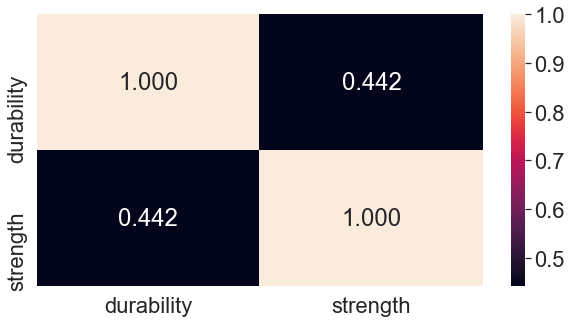

In [42]:
# correlation matrix
fig, ax = plt.subplots(1,1, figsize=(10,5))
all_cor = sns.heatmap(my_combinations1[my_cols].corr(), fmt=".3f", annot=True)

plt.savefig('weapons_shields_bows_comb_heatmap.png', bbox_inches='tight')

### Get Pareto-optimal Combinations and Pareto front

In [43]:
combinations3 = my_combinations1.copy()
combinations3 = combinations3[['durability', 'strength']]
combinations3 = combinations3.to_numpy()
combinations3

array([[68.66666667, 51.33333333],
       [34.        , 38.        ],
       [38.66666667, 44.66666667],
       ...,
       [24.66666667,  5.33333333],
       [50.66666667, 13.66666667],
       [24.        ,  5.        ]])

In [44]:
pareto = identify_pareto(combinations3)
print('Pareto front index values')
print('Points on Pareto front: \n',pareto)

pareto_front = combinations3[pareto]
print('\nPareto front scores')
print(pareto_front)

Pareto front index values
Points on Pareto front: 
 [21775 21790 45700 67975 67990]

Pareto front scores
[[373.33333333  54.66666667]
 [340.          56.66666667]
 [326.66666667  64.66666667]
 [318.33333333  70.66666667]
 [285.          72.66666667]]


In [45]:
pareto_front_df = pd.DataFrame(pareto_front)
pareto_front_df2 = pareto_front_df.copy()
pareto_front_df2

,0,1
0,373.333333,54.666667
1,340.000000,56.666667
2,326.666667,64.666667
3,318.333333,70.666667
4,285.000000,72.666667


In [46]:
combinations4 = my_combinations1.copy()
combinations4 = combinations4.reset_index()
combinations4

,index,durability,strength
0,"(Ancient Short Sword, Ancient Shield, Ancient ...",68.666667,51.333333
1,"(Ancient Short Sword, Ancient Shield, Boko Bow)",34.000000,38.000000
2,"(Ancient Short Sword, Ancient Shield, Dragon B...",38.666667,44.666667
3,"(Ancient Short Sword, Ancient Shield, Duplex Bow)",34.666667,41.333333
4,"(Ancient Short Sword, Ancient Shield, Falcon Bow)",45.333333,43.333333
...,...,...,...
104770,"(Zora Spear, Wooden Shield, Steel Lizal Bow)",34.000000,15.666667
104771,"(Zora Spear, Wooden Shield, Swallow Bow)",27.333333,6.666667
104772,"(Zora Spear, Wooden Shield, Traveler's Bow)",24.666667,5.333333
104773,"(Zora Spear, Wooden Shield, Twilight Bow)",50.666667,13.666667


In [47]:
combi = []
for i in pareto:
    combi.append(combinations4['index'][i])

for comb in combi:
    print(comb)


('Master Sword', 'Hylian Shield', 'Ancient Bow')
('Master Sword', 'Hylian Shield', "Royal Guard's Bow")
('Boulder Breaker', 'Hylian Shield', 'Ancient Bow')
('Savage Lynel Crusher', 'Hylian Shield', 'Ancient Bow')
('Savage Lynel Crusher', 'Hylian Shield', "Royal Guard's Bow")


In [48]:
pareto_front_df2['combi'] = combi
pareto_front_df2

,0,1,combi
0,373.333333,54.666667,"(Master Sword, Hylian Shield, Ancient Bow)"
1,340.000000,56.666667,"(Master Sword, Hylian Shield, Royal Guard's Bow)"
2,326.666667,64.666667,"(Boulder Breaker, Hylian Shield, Ancient Bow)"
3,318.333333,70.666667,"(Savage Lynel Crusher, Hylian Shield, Ancient ..."
4,285.000000,72.666667,"(Savage Lynel Crusher, Hylian Shield, Royal Gu..."


In [49]:
pareto_front_df2.sort_values(0, inplace=True)
pareto_front = pareto_front_df2.values
pareto_front

array([[285.0, 72.66666666666667,
        ('Savage Lynel Crusher', 'Hylian Shield', "Royal Guard's Bow")],
       [318.3333333333333, 70.66666666666667,
        ('Savage Lynel Crusher', 'Hylian Shield', 'Ancient Bow')],
       [326.6666666666667, 64.66666666666667,
        ('Boulder Breaker', 'Hylian Shield', 'Ancient Bow')],
       [340.0, 56.666666666666664,
        ('Master Sword', 'Hylian Shield', "Royal Guard's Bow")],
       [373.3333333333333, 54.666666666666664,
        ('Master Sword', 'Hylian Shield', 'Ancient Bow')]], dtype=object)

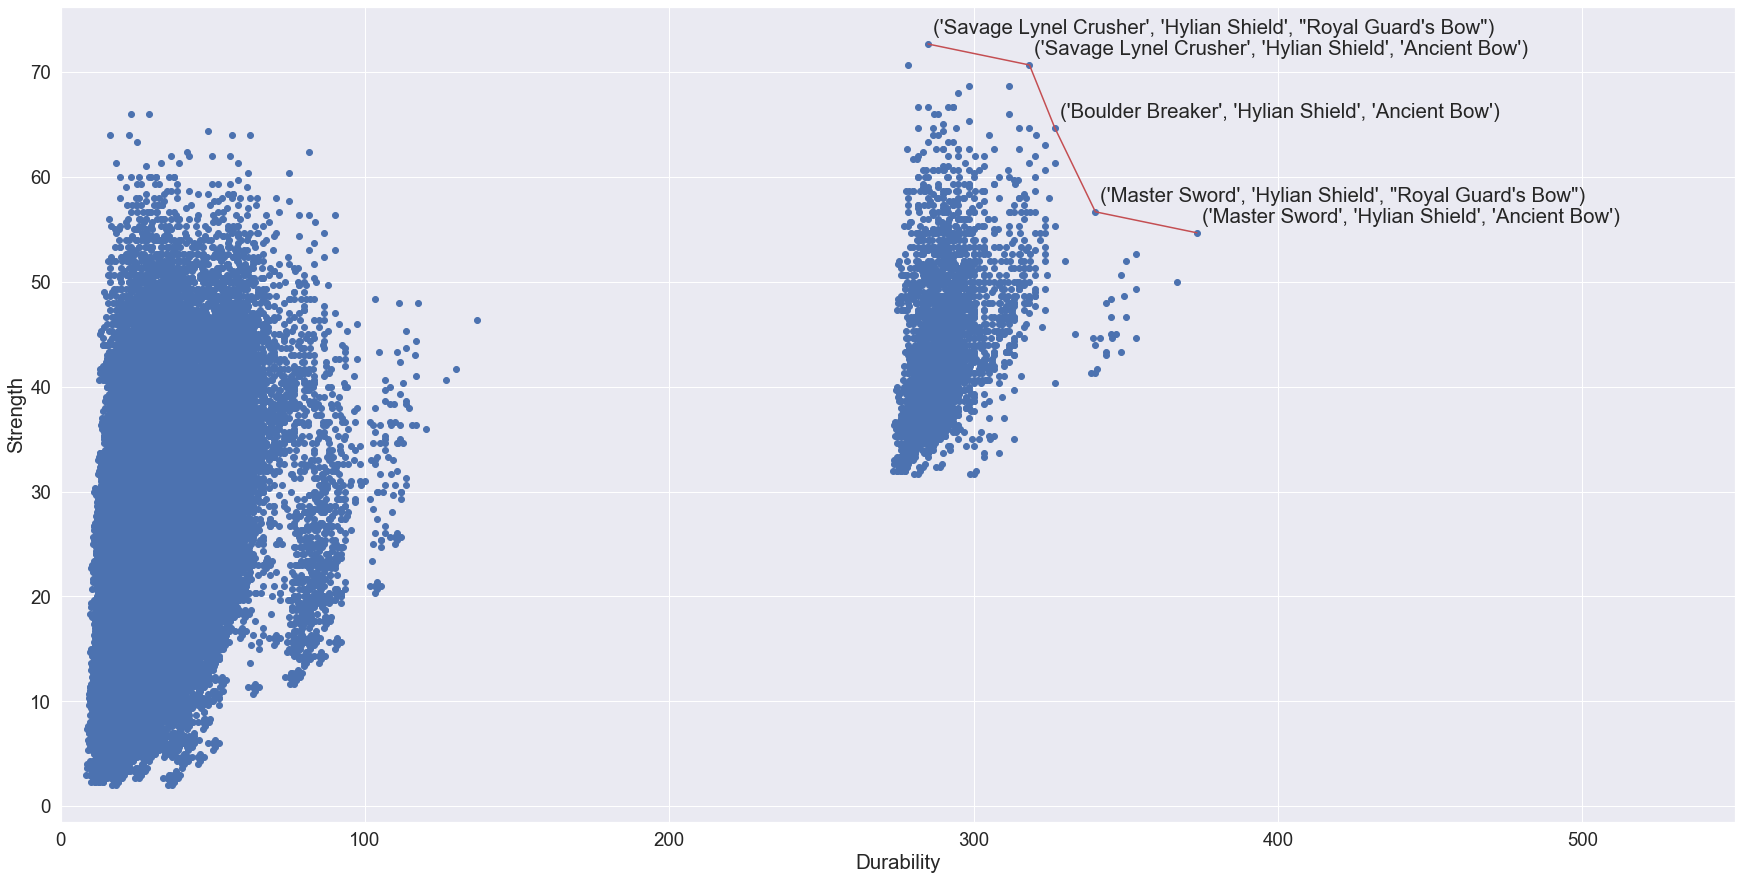

In [50]:
# plotting Pareto frontier

sns.set(font_scale=1.7)

x_all = combinations3[:, 0]
y_all = combinations3[:, 1]
x_pareto = pareto_front[:, 0]
y_pareto = pareto_front[:, 1]

fig, ax = plt.subplots(1,1, figsize=(30,15))

plt.scatter(x_all, y_all)
plt.plot(x_pareto, y_pareto, color='r')

for label, x, y in zip(pareto_front[:, 2], pareto_front[:, 0], pareto_front[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(5, 10),
        textcoords='offset points', ha='left')

plt.xlabel('Durability')
plt.ylabel('Strength')
plt.xlim(0,550)
plt.draw()

plt.savefig('weapons_shileds_bows_pareto_front.png', bbox_inches='tight')